<a href="https://colab.research.google.com/github/DeadDragon26/DeadDragon26/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

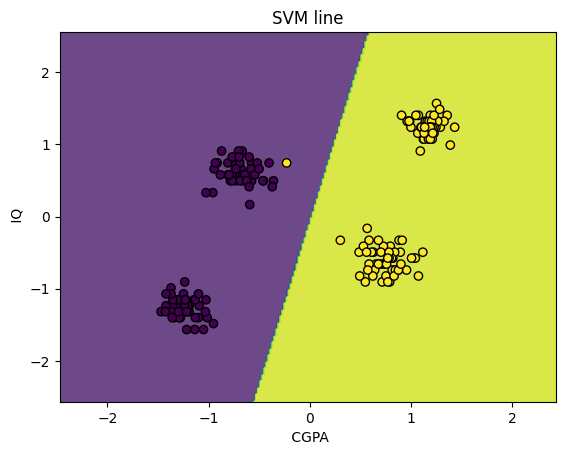

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("/content/student_clustering.csv")
pd.DataFrame(data)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(data_scaled)

svm_model = SVC(kernel='linear')
svm_model.fit(data_scaled, labels)

def decision_boundary(X, y, model):

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title('SVM line')
    plt.xlabel(' CGPA')
    plt.ylabel(' IQ')
    plt.show()

decision_boundary(data_scaled, labels, svm_model)
